<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-3)" data-toc-modified-id="Общее-впечатление-(ревью-3)-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 3)</font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выводы:</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Обучение-LogisticRegression" data-toc-modified-id="Обучение-LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обучение LogisticRegression</a></span></li><li><span><a href="#Обучение-DecisionTreeClassifier" data-toc-modified-id="Обучение-DecisionTreeClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение DecisionTreeClassifier</a></span></li><li><span><a href="#Обучение-LGBMClassifier" data-toc-modified-id="Обучение-LGBMClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обучение LGBMClassifier</a></span></li><li><span><a href="#Промежуточные-выводы:" data-toc-modified-id="Промежуточные-выводы:-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Промежуточные выводы:</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

### Загрузка библиотек

In [1]:
import re
import nltk
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from nltk.corpus import stopwords as nltk_stopwords
import spacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, make_scorer 
from tqdm.notebook import tqdm
from tqdm.auto import tqdm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

import torch
from transformers import BertTokenizer, BertForSequenceClassification, BertModel
from transformers import Trainer, TrainingArguments, AutoModel, AutoTokenizer
from torch.utils.data import DataLoader, Dataset
from nltk.corpus import stopwords, wordnet

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

In [3]:
sw = stopwords.words('english')

In [4]:
data = pd.read_csv('/datasets/toxic_comments.csv')

In [5]:
#выведем на экран первые 5 строк нашего набора данных
data.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


Изучим общую информацию о датафрейме

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


In [7]:
#посмотрим размер набора данных
data.shape

(159292, 3)

Столбец "Unnamed: 0" не несет никакой информационной ценности, возможно он образовался при ошибках в сохранении данных. В любом случае он нам не нужен, поэтому удалим его

In [8]:
data = data.drop(columns = ['Unnamed: 0'])

### Предобработка данных 

Найдем явные дубликаты

In [9]:
print(' Количество явных дубликатов: ', data.duplicated().sum())

 Количество явных дубликатов:  0


In [10]:
data.describe()

,toxic
count,159292.000000
mean,0.101612
std,0.302139
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [11]:
print(' Количество пропущенных значений: ', data.isna().sum())

 Количество пропущенных значений:  text     0
toxic    0
dtype: int64


Целевой признак - "toxic"

приведем данные к нижнему регистру и очистим текст

In [12]:
def clean(text):
    text = text.lower()
    text = re.sub(r'(?:\n|\r)', ' ', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text
    return " ".join(text)

### Лемматизация

Создадим функцию по очистки текста от лишних символов и стоп-слов

In [13]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [14]:
#объявим лемматизатор
wnl = WordNetLemmatizer()

Создадим функцию по лемматизации текста

In [15]:
def lemmitize_text(text):
    text = [wnl.lemmatize(word, get_wordnet_pos(word)) for word in text]
    return text

Создадим функцию для очистки текста

In [16]:
def clear_text(text):
    pattern = r'[a-zA-Z]+'
    text = re.findall(pattern, text)
    text = [word.lower() for word in text if word.lower() not in sw]
    text = lemmitize_text(text)
    return " ".join(text)

In [17]:
#установил последнии версии библиотек, без этого далее были трудности

In [18]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
#создадим набор слов
sw = stopwords.words('english')

In [20]:
# Загрузим список стоп-слов
nltk.download('stopwords')

# Создадим набор стоп-слов 
stopwords = set(sw)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Добавим в наш датайрейм новый столбец с лемматизированным текстом
Для установления прогресса в цикле использовал tqdm. Процесс конечно небыстрый 

In [21]:
tqdm.pandas() 
data['lemm_text'] = data['text'].progress_apply(clear_text)

  0%|          | 0/159292 [00:00<?, ?it/s]

In [22]:
data.head()

,text,toxic,lemm_text
0,Explanation\nWhy the edits made under my usern...,0,explanation edits make username hardcore metal...
1,D'aww! He matches this background colour I'm s...,0,aww match background colour seemingly stuck th...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man really try edit war guy constantly rem...
3,"""\nMore\nI can't make any real suggestions on ...",0,make real suggestion improvement wonder sectio...
4,"You, sir, are my hero. Any chance you remember...",0,sir hero chance remember page


Для наглядности, построим график распределения токсичных и нетоксичных отзывов

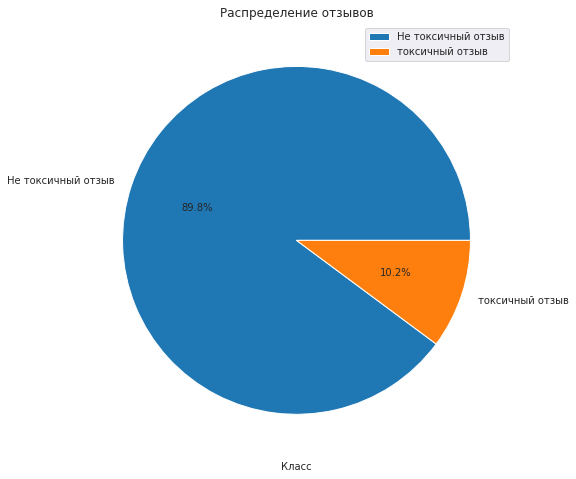

In [23]:
sns.set_style('darkgrid')
data['toxic'].value_counts().plot(kind='pie' ,figsize=[8, 8], legend=True,
                                  autopct ='%1.1f%%',labels = ['Не токсичный отзыв','токсичный отзыв'])
plt.title('Распределение отзывов')
plt.xlabel('Класс')
plt.ylabel('')
plt.show()

### Выводы:
- загрузили и изучили данные о датафрейме
- провели предобработку данных
- лемматизировали текст и добавили новый столбец с лемм текстом
- построили график распределения токсичных и не токсичных отзывов
- токсичных отзывов значительно меньше, чем токсичных. Наблюдаем явный дисбаланс в классах (соотношение 9 к 1)

## Обучение

In [24]:
RANDOM_STATE = 1234

In [25]:
data.head()

,text,toxic,lemm_text
0,Explanation\nWhy the edits made under my usern...,0,explanation edits make username hardcore metal...
1,D'aww! He matches this background colour I'm s...,0,aww match background colour seemingly stuck th...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man really try edit war guy constantly rem...
3,"""\nMore\nI can't make any real suggestions on ...",0,make real suggestion improvement wonder sectio...
4,"You, sir, are my hero. Any chance you remember...",0,sir hero chance remember page


Разделим данные на тренировочные и тестовые 

In [26]:
# Разделение на тренировочный и тестовый наборы
features_train, features_test, = train_test_split(
        data['lemm_text'], test_size=0.2,
        shuffle=True, random_state = RANDOM_STATE)
target_train, target_test = train_test_split(
        data['toxic'], test_size=0.2, 
        shuffle=True, random_state = RANDOM_STATE) 

Выполним векторизацию текста 

In [27]:
count_tf_idf = TfidfVectorizer()
tf_idf_train = count_tf_idf.fit_transform(features_train)
tf_idf_test = count_tf_idf.transform(features_test)

Создадим новый признак с длиной лемматизированного текста

In [28]:
def calc_len(text):
    text = text.split() 
    return len(text)
    
data['text_len'] = data.lemm_text.apply(calc_len)
data.head()

,text,toxic,lemm_text,text_len
0,Explanation\nWhy the edits made under my usern...,0,explanation edits make username hardcore metal...,23
1,D'aww! He matches this background colour I'm s...,0,aww match background colour seemingly stuck th...,10
2,"Hey man, I'm really not trying to edit war. It...",0,hey man really try edit war guy constantly rem...,21
3,"""\nMore\nI can't make any real suggestions on ...",0,make real suggestion improvement wonder sectio...,52
4,"You, sir, are my hero. Any chance you remember...",0,sir hero chance remember page,5


In [29]:
# посмотрим на количество объектов с минимальной длиной (0-1)
data[data.text_len<=1]

,text,toxic,lemm_text,text_len
177,"86.29.244.57|86.29.244.57]] 04:21, 14 May 2007",0,may,1
627,Seems we both have some.,0,seem,1
807,You are \n\nso retarded.,1,retard,1
899,I've just seen that,0,see,1
1049,"10:36, 5 January 2012",0,january,1
...,...,...,...,...
158382,and that's why it wasn't evident,0,evident,1
158465,hi \n\nwho is this 65.7.162.38,0,hi,1
158740,Why don't you do it? 24.68.148.215,0,,0
158791,!!! \nDOWN WITH THE USA!!!,1,usa,1


Для дальнейшей работы они нам не нужны, поэтому удалим их

In [30]:
data = data.drop(index=data[data.text_len<=1].index)

Далее изучим объекты с максимальной длиной

In [31]:
data.sort_values(by='text_len', ascending=False)

,text,toxic,lemm_text,text_len
76466,DIE FAG DIE FAG DIE FAG DIE FAG DIE FAG DIE FA...,1,die fag die fag die fag die fag die fag die fa...,1250
32074,PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PI...,1,pig pig pig pig pig pig pig pig pig pig pig pi...,1250
149769,LOL LOL LOL LOL LOL LOL LOL LOL LOL LOL LOL LO...,0,lol lol lol lol lol lol lol lol lol lol lol lo...,1250
61679,OH NOES OH NOES OH NOES OH NOES OH NOES OH NOE...,0,oh no oh no oh no oh no oh no oh no oh no oh n...,1250
153079,FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JE...,1,fat jew fat jew fat jew fat jew fat jew fat je...,1247
...,...,...,...,...
53899,Where's the rest of my page?,0,rest page,2
8243,"07, 4 August 2011 (UTC) 17:",0,august utc,2
83948,is done by forces that,0,do force,2
83944,I am find with it being removed. -),0,find remove,2


Много слов часто повторяются, удалим их. Для этого создадим функцию

In [32]:
def dublicated_words(text):
    words = text.split()
    return " ".join(sorted(set(words), key=words.index))

Удалим повторяющиеся слова

In [33]:
data['lemm_text'] = data['lemm_text'].progress_apply(dublicated_words)

  0%|          | 0/158433 [00:00<?, ?it/s]

In [34]:
# Пересчитаем длину леммированных твитов:
data['text_len'] = data['lemm_text'].progress_apply(calc_len)
data.head()

  0%|          | 0/158433 [00:00<?, ?it/s]

,text,toxic,lemm_text,text_len
0,Explanation\nWhy the edits made under my usern...,0,explanation edits make username hardcore metal...,23
1,D'aww! He matches this background colour I'm s...,0,aww match background colour seemingly stuck th...,10
2,"Hey man, I'm really not trying to edit war. It...",0,hey man really try edit war guy constantly rem...,20
3,"""\nMore\nI can't make any real suggestions on ...",0,make real suggestion improvement wonder sectio...,46
4,"You, sir, are my hero. Any chance you remember...",0,sir hero chance remember page,5


Создадим датафрейм, в котором будем хранить результаты работы наших моделей

In [35]:
df_results = pd.DataFrame(columns=['name_model', 'best_score_', 
                                   'parameters'])
def model_metrics(name_model, best_score, params):
    if name_model not in list(df_results['name_model']):  
        df_results.loc[len(df_results.index )] = \
            [name_model, best_score, params]

Для упрощения сбора результатов с обучения моделей, создадим функции

In [36]:
def Model(classificator, params, name):
    # Чтобы видеть, что процесс выполняется, поставим tqdm с разовым циклом:
    for _ in tqdm(range(1)):
        grid = GridSearchCV(classificator, params, scoring='f1', 
                            cv=3)
        grid.fit(tf_idf_train, target_train)  
        model_metrics(name, grid.best_score_, 
                      grid.best_params_)

### Обучение LogisticRegression

In [37]:
LR = LogisticRegression(fit_intercept=True, 
                                class_weight='balanced', 
                                random_state=12345,
                                solver='liblinear'
                                )
regression_parameters = {'C': [1, 10]}   

In [38]:
Model(LR, regression_parameters, 'LogisticRegression')

  0%|          | 0/1 [00:00<?, ?it/s]

Поскольку у нас наблюдается дисбаланс в классах, при обучении используем class_weight='balanced'

In [39]:
df_results

,name_model,best_score_,parameters
0,LogisticRegression,0.765508,{'C': 10}


### Обучение DecisionTreeClassifier

In [40]:
DTC = DecisionTreeClassifier(class_weight='balanced', 
                                      random_state=RANDOM_STATE
                                      )
dtc_parameters = {'max_depth': [20]}

In [41]:
Model(DTC, dtc_parameters, 'DecisionTreeClassifier')

  0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
df_results

,name_model,best_score_,parameters
0,LogisticRegression,0.765508,{'C': 10}
1,DecisionTreeClassifier,0.630642,{'max_depth': 20}


### Обучение LGBMClassifier

In [43]:
lgbm = LGBMClassifier(learning_rate=0.15, 
                      random_state=RANDOM_STATE
                      )
lgbm_params = {'max_depth': [30],
                   'n_estimators': [100]
                  }
    
Model(lgbm, lgbm_params, 'LGBMClassifier')

  0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
df_results

,name_model,best_score_,parameters
0,LogisticRegression,0.765508,{'C': 10}
1,DecisionTreeClassifier,0.630642,{'max_depth': 20}
2,LGBMClassifier,0.760718,"{'max_depth': 30, 'n_estimators': 100}"


### Промежуточные выводы:
- подготовили данные
- обучили три разные модели: LogisticRegression, DecisionTreeClassifier	и LGBMClassifier
- под условие задачи (метрика качества F1 не меньше 0.75) подходят сразу 2 модели: LogisticRegression и LGBMClassifier	
- Выберем модель LogisticRegression, поскольку она получила наивысшую метрику - 0.765508	

## Выводы

- загрузили и изучили данные
- провели предобработку данных
- лемматизировали текст и добавили новый столбец с лемм текстом
- построили график распределения токсичных и не токсичных отзывов
- токсичных отзывов значительно меньше, чем токсичных. Наблюдаем явный дисбаланс в классах (соотношение 9 к 1)
- учли это при обучении моделей
- добавили новый признак с длиной лемматизированного текста
- удалили повторяющиеся слова и объекты с минимальной длиной
- подготовили данные и обучили три модели LogisticRegression, DecisionTreeClassifier и LGBMClassifier
- под условие задачи попали две - LogisticRegression и LGBMClassifier
- выбрали модель LogisticRegression, поскольку метрика F1 у нее оказалась выше. 

Для классификации комментариев на позитивнее и негативнее лучше всего подходит модель LogisticRegression

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны